In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [131]:
df = pd.read_csv("zomato.csv")

In [132]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [134]:
#getting idea of missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [135]:
#only votes are given as integers
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [136]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [137]:
#separating features that have missing values
featurena = []
for test in df.columns:
    if df.isnull().sum()[test] > 0:
        featurena.append(test)
    else:
        pass
featurena

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [138]:
#percentage missing data features
for i in featurena:
    permiss = (df.isnull().sum()[i] / len(df))*100
    print("feature {} has {} percent missing data".format(i,permiss))
    
#it is found that ratings and dish liked is the most missing features    

feature rate has 15.033741322969234 percent missing data
feature phone has 2.335789005549432 percent missing data
feature location has 0.04060560357329312 percent missing data
feature rest_type has 0.438927238625597 percent missing data
feature dish_liked has 54.29162557766305 percent missing data
feature cuisines has 0.08701200765705668 percent missing data
feature approx_cost(for two people) has 0.669025658874258 percent missing data


## DATA Cleaning and Preparations

In [139]:
#it data type is object but it must be a integer and there are useless commas example (1,200) representing 1200
df["approx_cost(for two people)"].dtype

dtype('O')

In [140]:
#custom function to remove comma
def commaremove(test):
    test2 = test.replace(",","")
    return test2

In [141]:
#Nan values are float in data type... so it is converted into string first or it will not allow replace function to work
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).apply(commaremove)

In [142]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [143]:
#finally convert all values as float
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(float)

In [144]:
df['approx_cost(for two people)'].dtype

dtype('float64')

**Preparing Rate coloumn**

In [145]:
#this also need to converted into floats and removing  /5 from every element
#lots of nan values and well As "New"  and useless "-" will be treated as zero rating
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [146]:
#function returning first element of list of sttring splitted by "/"
def remover(test):
    test2=test.split("/")[0]
    return test2

In [147]:
df["rate"]=df["rate"].astype(str).apply(remover)

In [148]:
#this replace call is inbuilt call of pandas for editing a pandas series
df['rate']=df['rate'].replace('NEW',0)
df['rate']=df['rate'].replace('-',0)

In [149]:
df['rate']=df['rate'].astype(float)

In [150]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [151]:
#total data rows
len(df)

51717

In [152]:
#casual and dining far more in number than any other type 
df["rest_type"].value_counts().nlargest(20)

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
Takeaway, Delivery             2037
Casual Dining, Bar             1154
Bakery                         1141
Beverage Shop                   867
Bar                             697
Food Court                      624
Sweet Shop                      468
Bar, Casual Dining              425
Lounge                          396
Pub                             357
Fine Dining                     346
Casual Dining, Cafe             319
Beverage Shop, Quick Bites      298
Bakery, Quick Bites             289
Mess                            267
Name: rest_type, dtype: int64

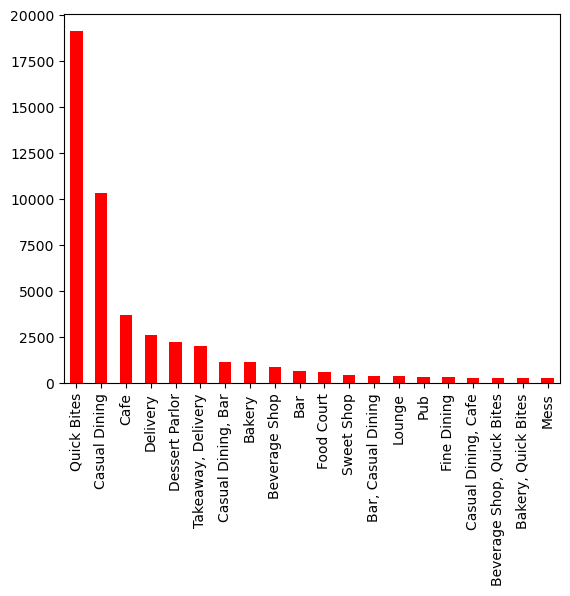

In [153]:
#matplot lib directly plots from pandas series
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.xticks(rotation=90);


In [154]:
#function to divide data in two categories
def  restconverter(test):
    if test in("Quick Bites","Casual Dining"):
        return "Quick Bites+Casual Dining"
    else:
        return "Others"
    

In [155]:
df['Top_types']=df['rest_type'].apply(restconverter)

In [156]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


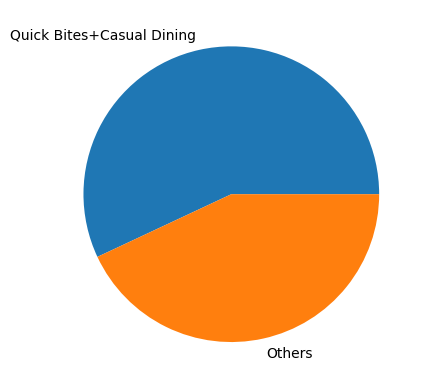

In [157]:
#it looks almost 60% restaurents fall in casua+dining style
values=df['Top_types'].value_counts()
labels=df['Top_types'].value_counts().index
plt.pie(values,labels=labels);

In [158]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


## Performance Dataframe

In [159]:
#we are creating a new dataframe for performance
#it is expected that some restaurents can have diffent branches with same name
#all are aggregated to check their collective perfoamnace
rest = df.groupby("name").agg({'votes':'sum','url': 'count','approx_cost(for two people)': 'mean','rate': 'mean'}).reset_index()

In [160]:
rest.head()

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [161]:
#columns names are edited to suit the cause
rest.columns = ['name', 'total_votes', 'total_units', 'avg_approx_cost', 'mean_rating']
rest.head()

,name,total_votes,total_units,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [162]:
#add a new column for avg. votes per branch
rest['avg_votes_per_units'] = rest['total_votes'] / rest['total_units']
rest.head()

,name,total_votes,total_units,avg_approx_cost,mean_rating,avg_votes_per_units
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [163]:
#popularity by total branches
popular=rest.sort_values(by='total_units', ascending=False)
popular

,name,total_votes,total_units,avg_approx_cost,mean_rating,avg_votes_per_units
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [164]:
popular.shape

(8792, 6)

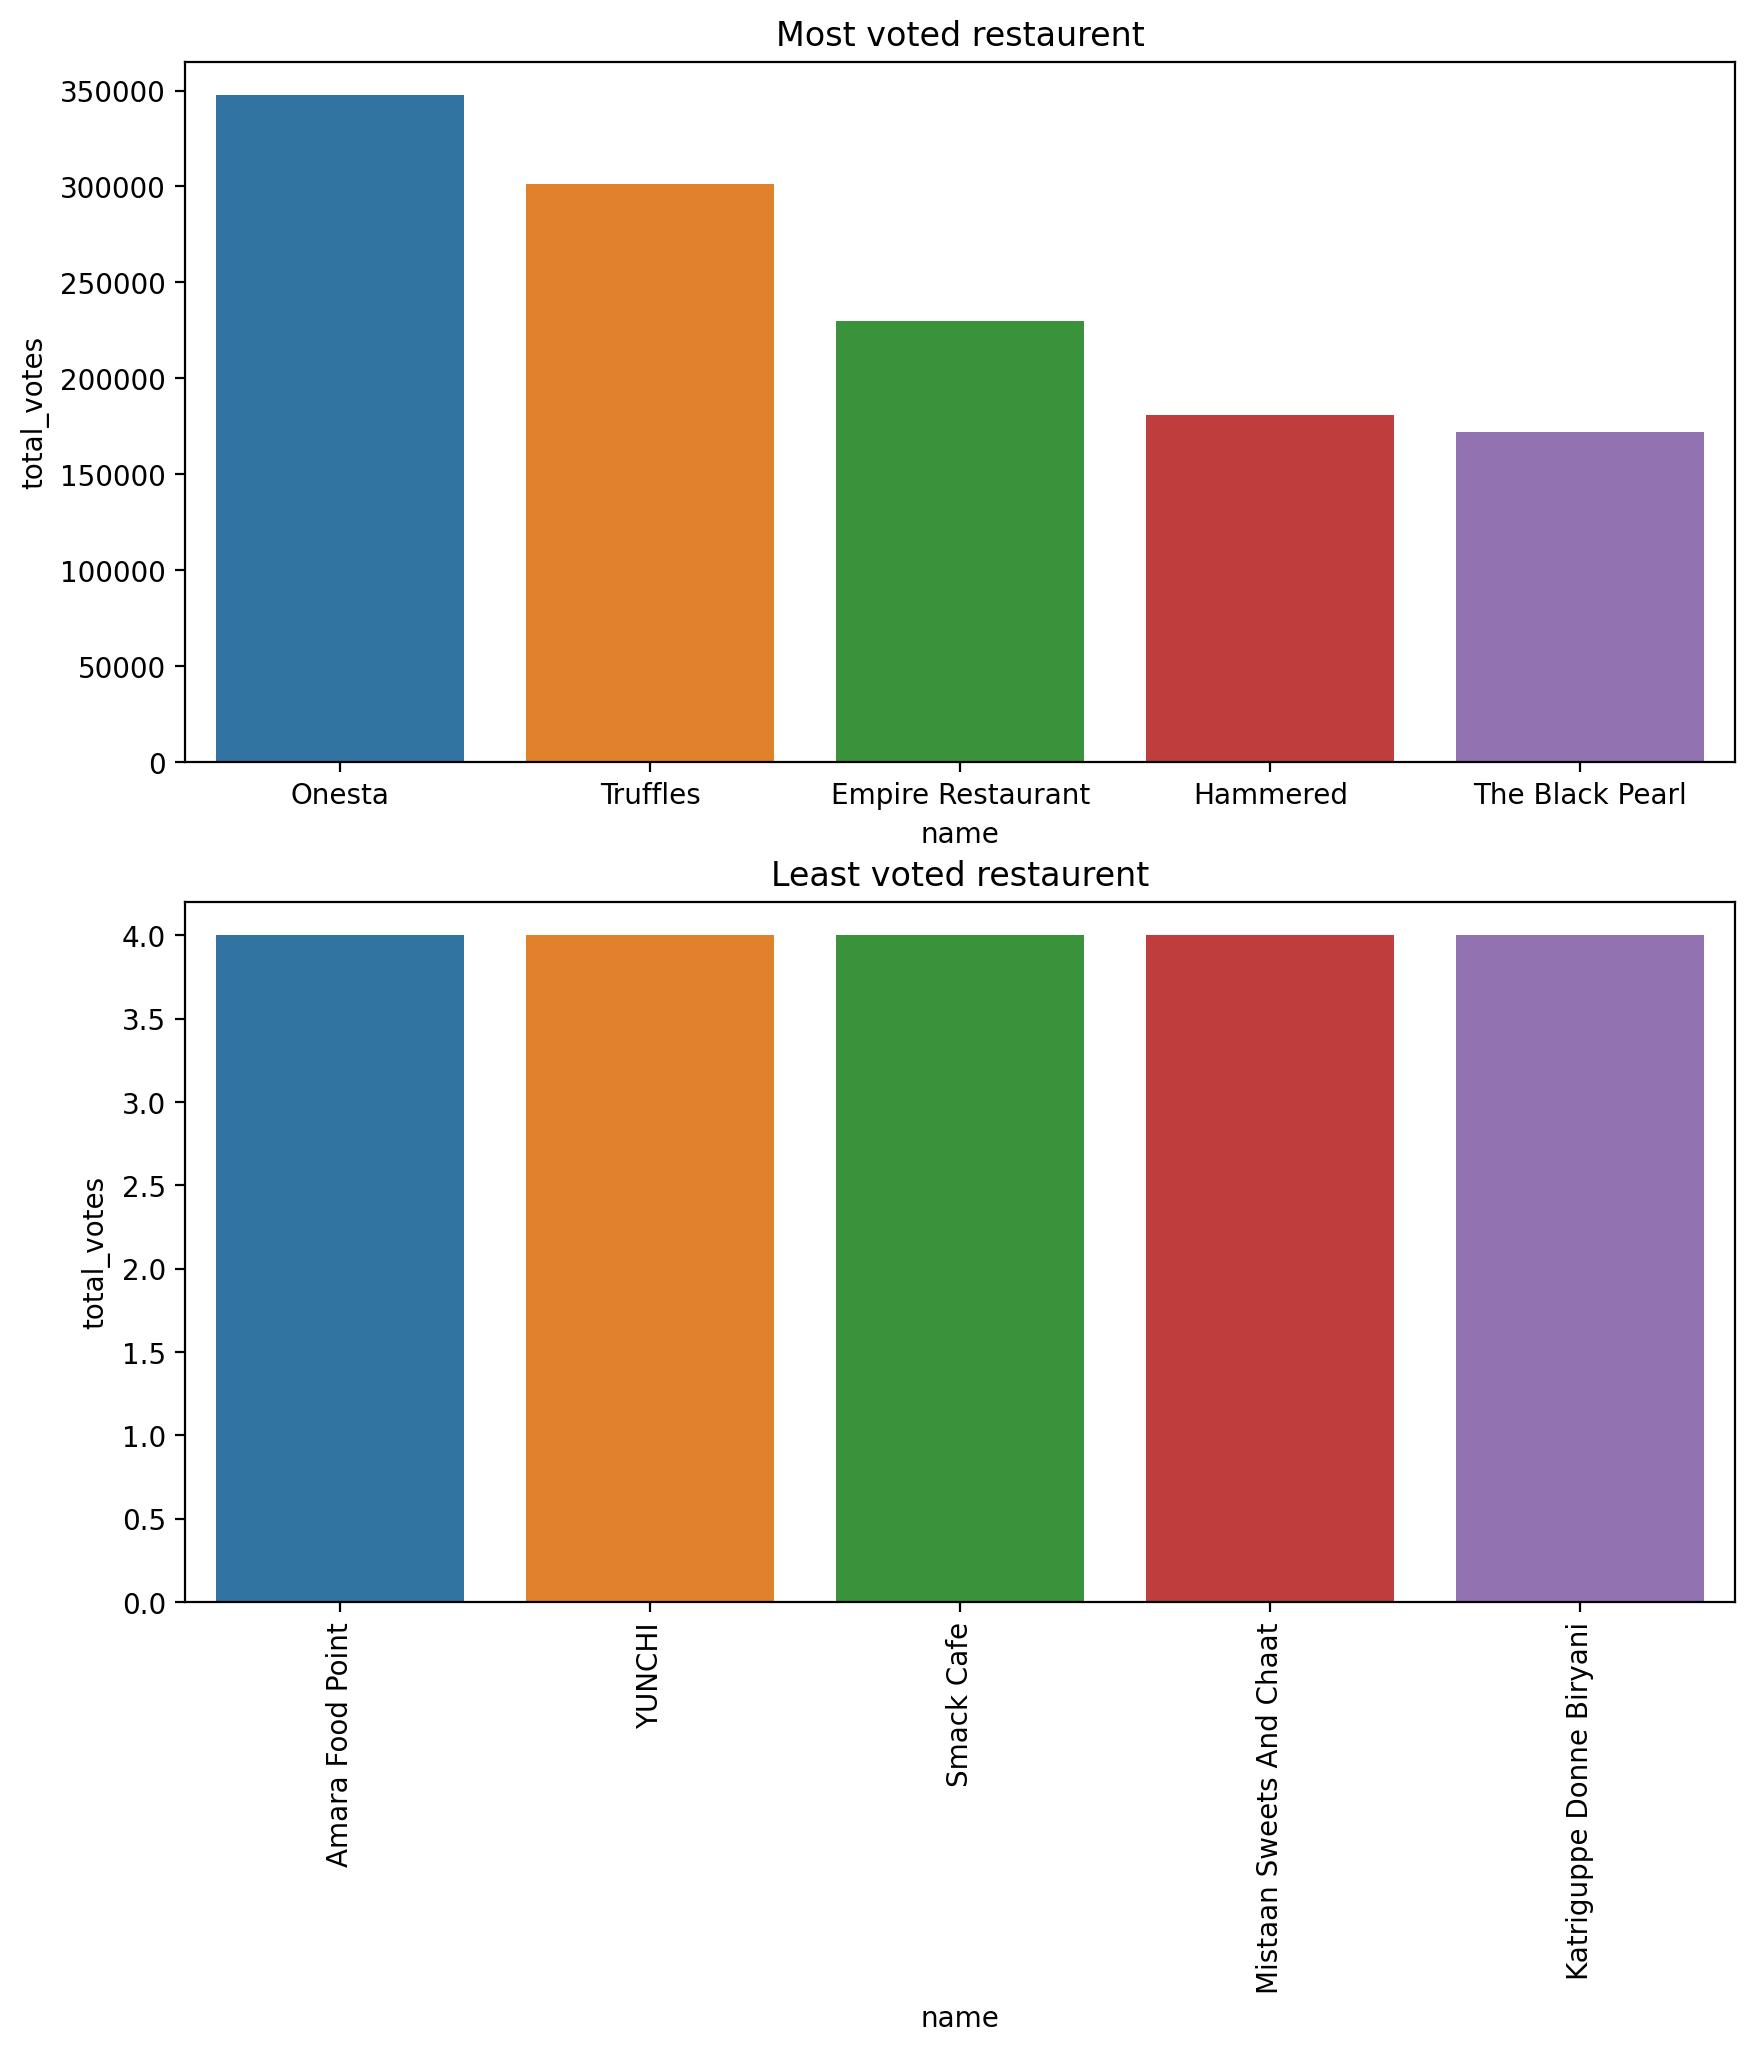

In [165]:
#popularity by total votes
fig , axes = plt.subplots(nrows=2,ncols=1,figsize = (10,10),dpi=200)

#most popular restaurant by votes
sns.barplot(x="name",y="total_votes",data=popular.sort_values(by="total_votes",ascending=False)[0:5],ax=axes[0])
axes[0].set_title("Most voted restaurent")
plt.xticks(rotation=90);

#least voted restautant
axes[1].set_title("Least voted restaurent")
sns.barplot(x="name",y="total_votes",data=popular[popular["total_votes"]>0].sort_values(by="total_votes",ascending=True)[0:5],ax=axes[1])
plt.xticks(rotation=90);


<Axes: title={'center': 'Top 5 Least expensive Restaurent'}, xlabel='avg_approx_cost', ylabel='name'>

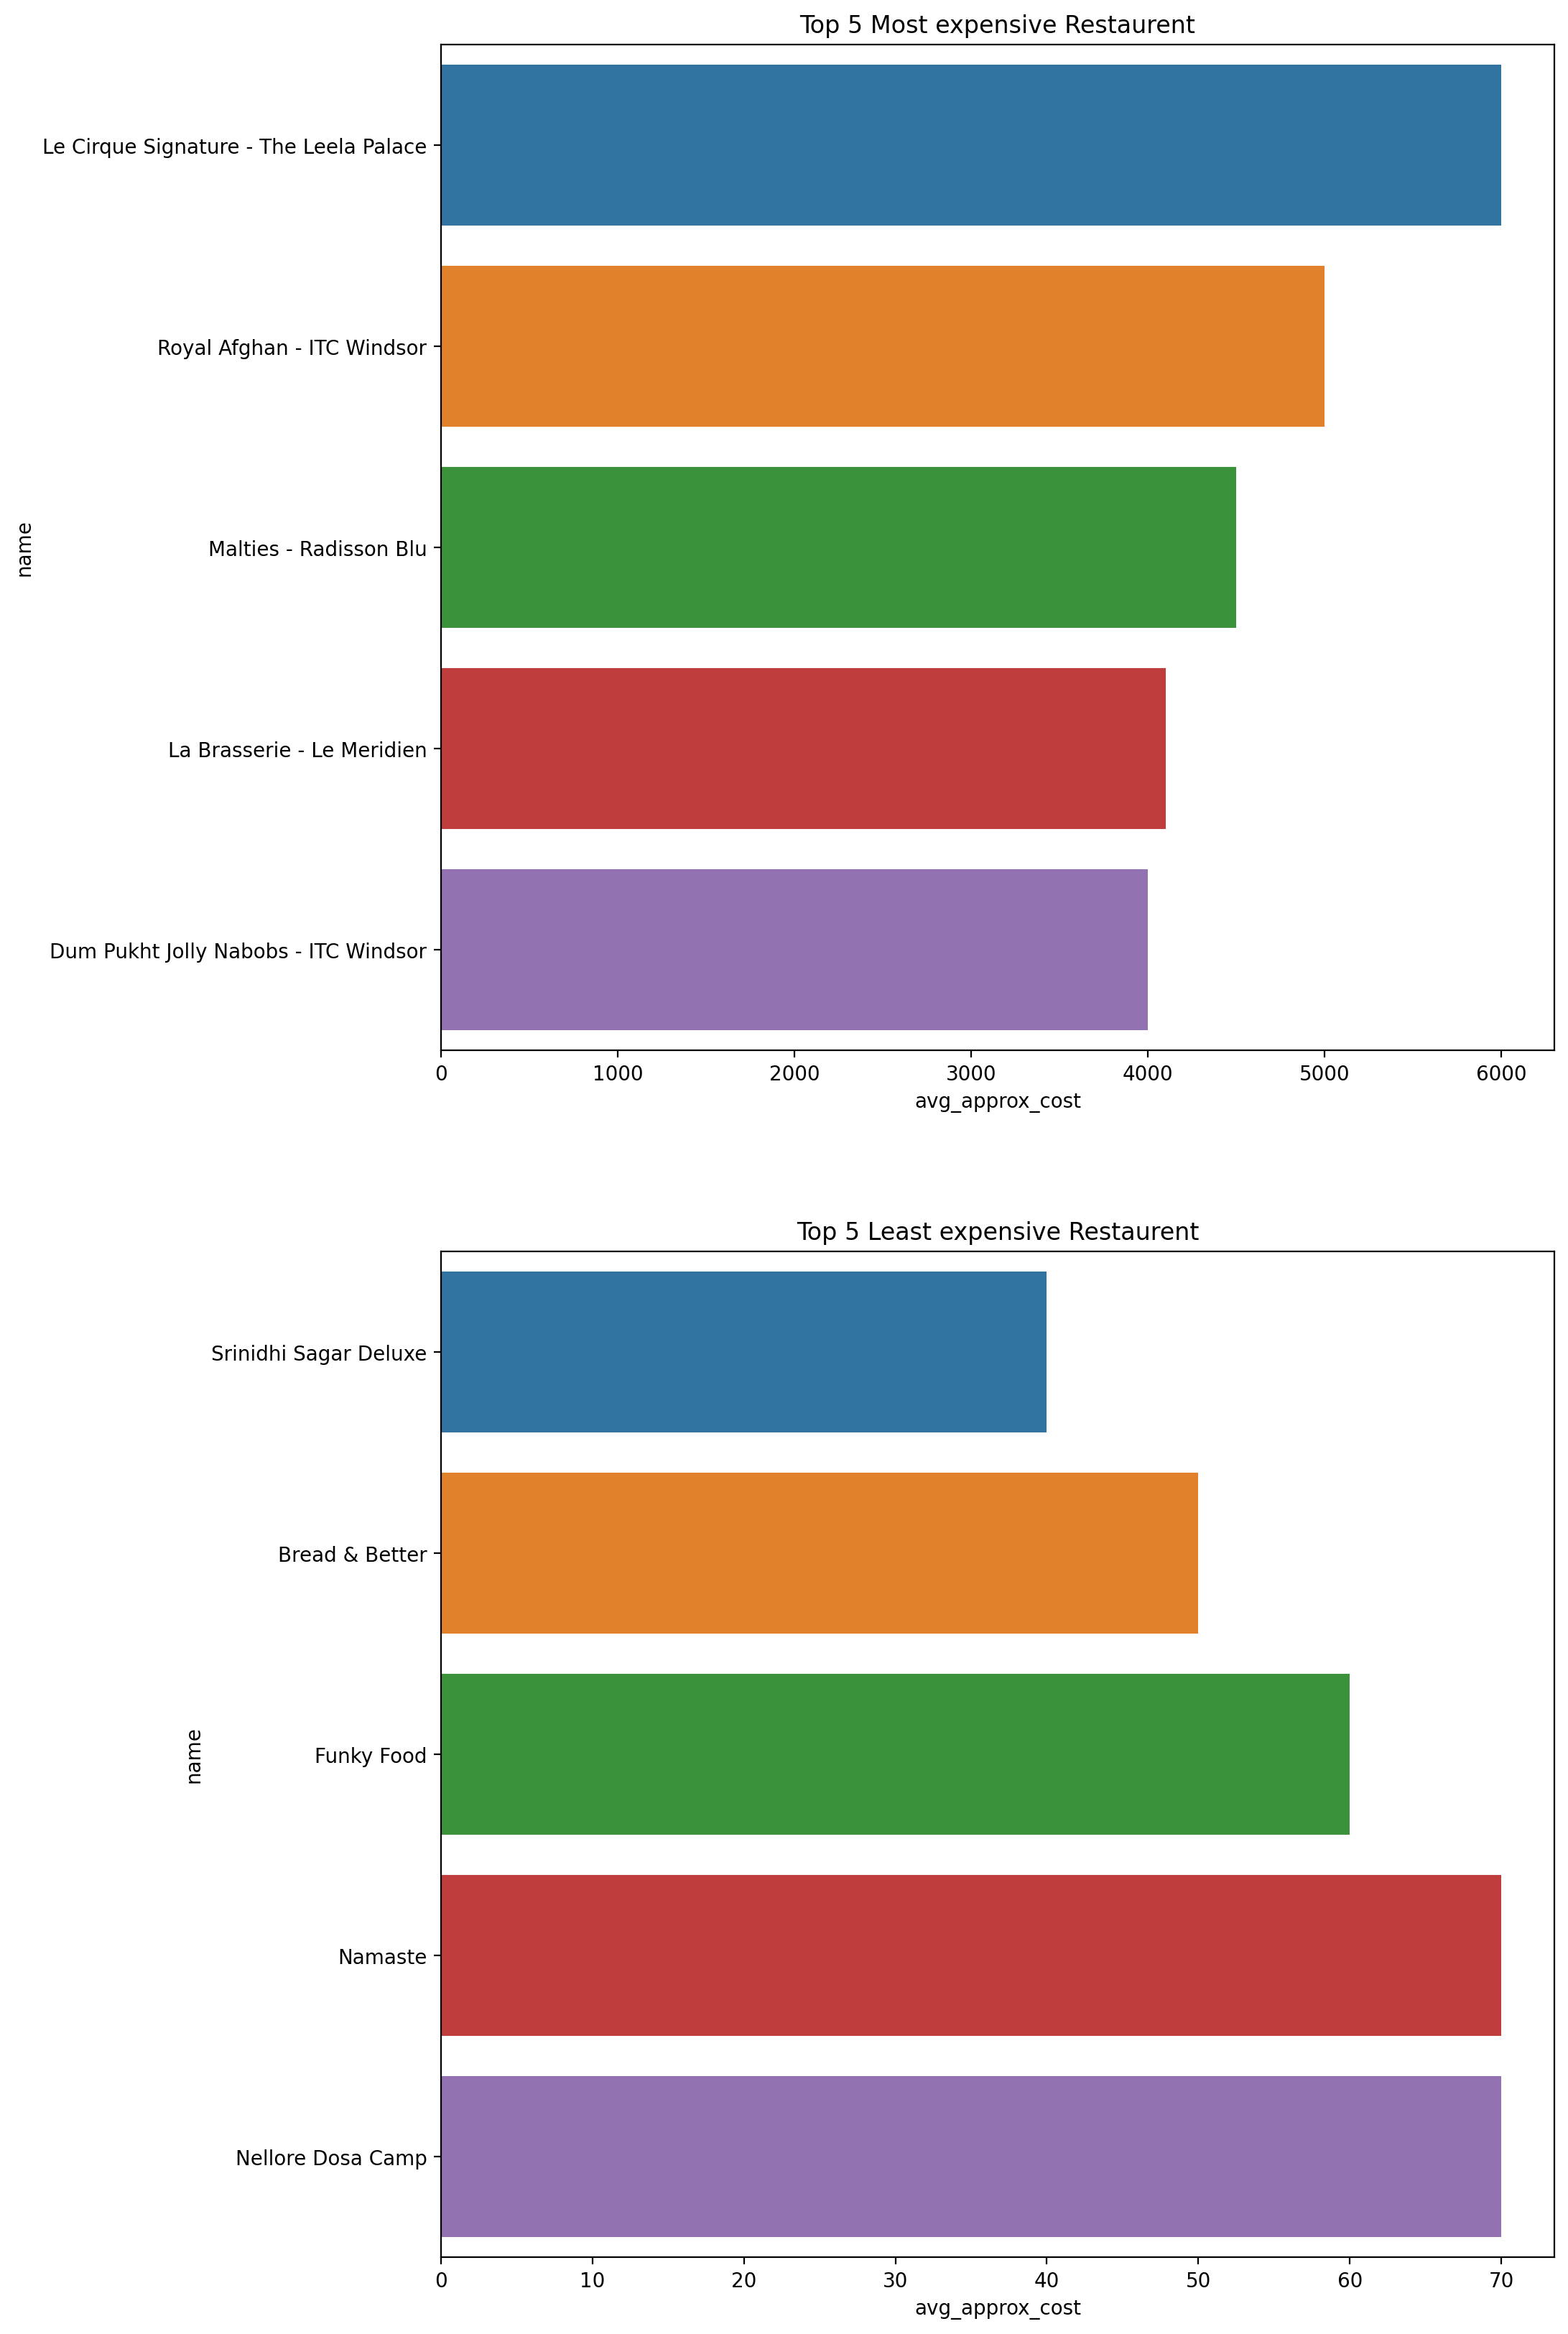

In [166]:
#popularity by expense
fig , axes = plt.subplots(nrows=2,ncols=1,figsize = (10,20),dpi=200)

#most expensive restaurent
axes[0].set_title("Top 5 Most expensive Restaurent")
sns.barplot(x="avg_approx_cost",y="name", data = popular.sort_values(by="avg_approx_cost",ascending=False)[0:5],ax=axes[0])

#least expensive restaurent
axes[1].set_title("Top 5 Least expensive Restaurent")
sns.barplot(x="avg_approx_cost",y="name", data = popular.sort_values(by="avg_approx_cost",ascending=True)[0:5],ax=axes[1])


In [167]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


<Axes: title={'center': 'online order or not'}, xlabel='online_order', ylabel='count'>

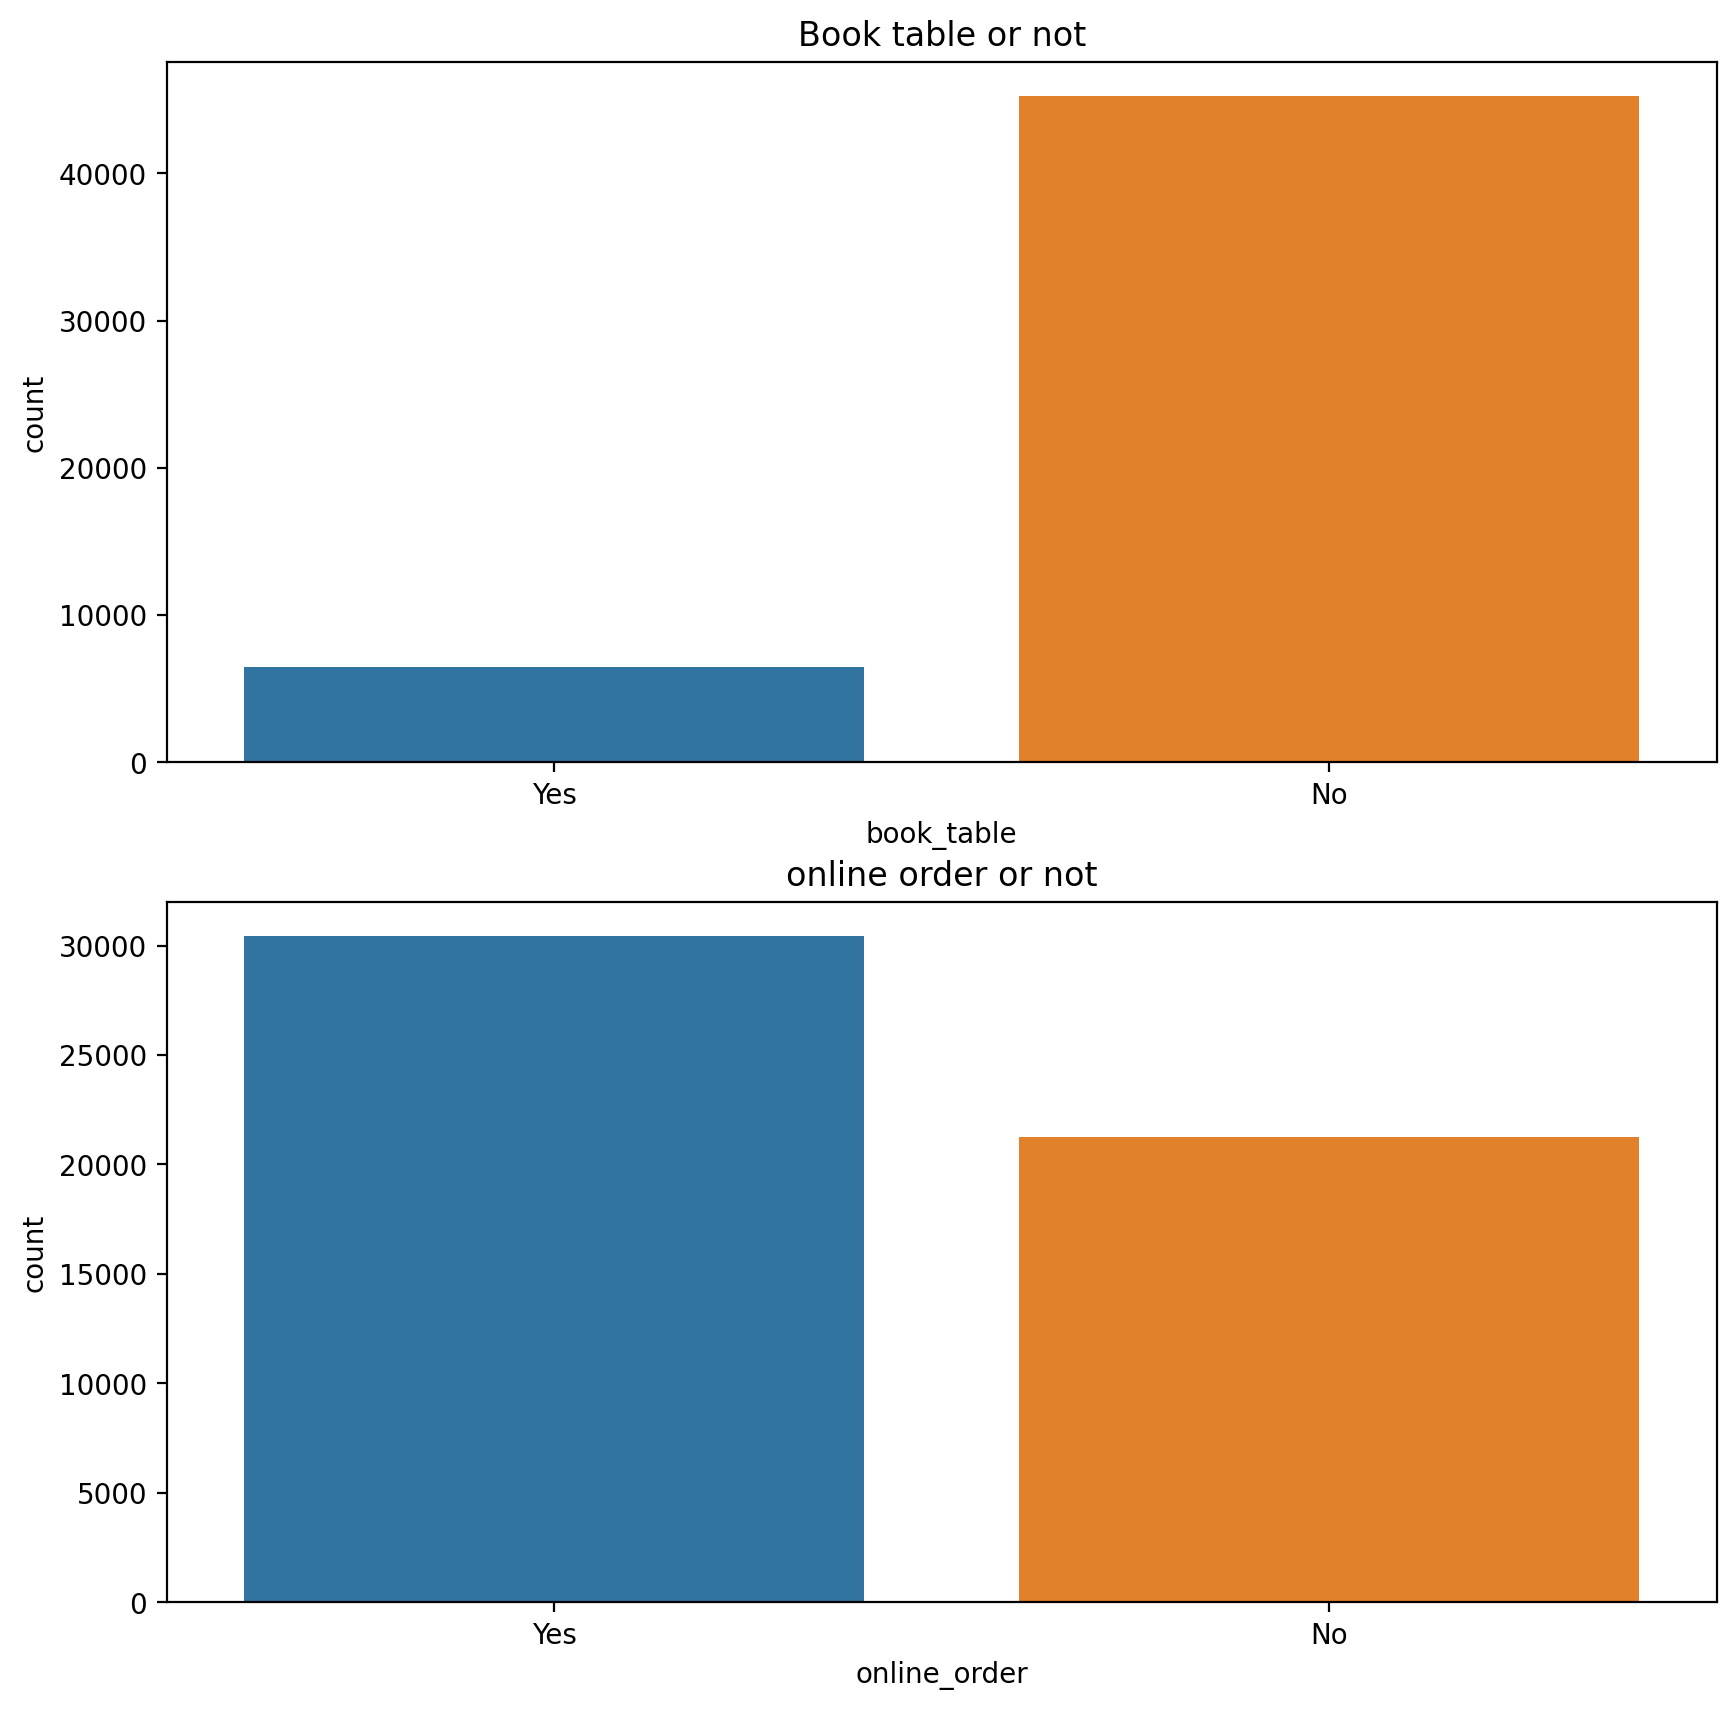

In [168]:
fig , axes = plt.subplots(nrows=2,ncols=1,figsize = (10,10),dpi=200)

axes[0].set_title("Book table or not")
sns.countplot(x="book_table",data=df,ax=axes[0])

axes[1].set_title("online order or not")
sns.countplot(x="online_order",data = df, ax=axes[1])

**Finding Best budget Restaurent**

In [169]:
#building a function to find a budget restaurent
def return_budget(location,Rtype):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==Rtype)]
    return(budget['name'].unique())

In [170]:
return_budget("Banashankari","Quick Bites")

array(['The Biryani Cafe', 'Bengaluru Coffee House', 'Mini Punjabi Dhaba',
       'Udupi Ruchi Grand', 'Ayodhya Upachar', 'Taaza Thindi',
       'Sri Laxmi Venkateshwara Coffee Bar', 'SLV Refreshment'],
      dtype=object)

**Geographical Analysis**

In [171]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [173]:
#dataframe of unique locations with bangalore added it front
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [174]:
#import the geocoder
from geopy.geocoders import Nominatim

In [175]:
lat=[]
lon=[]
#create instance of geocoder
geolocator=Nominatim(user_agent="app")
# for all unique locations in location name
for location in locations['Name']:
    location = geolocator.geocode(location)
    #if location is not identified
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    #append latitude and longitude list    
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [178]:
#add two new columns in loaction data frame and save

locations['latitude']=lat
locations['longitude']=lon
#locations.to_csv('zomato_locations1.csv',index=False)

In [179]:
pd.read_csv("zomato_locations1.csv")

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,13.834591,75.733936
2,Mysore Road,12.946662,77.530090
3,Jayanagar,27.349301,95.315941
4,Kumaraswamy Layout,12.906768,77.559502
...,...,...,...
89,West Bangalore,13.009476,77.553089
90,Magadi Road,12.975608,77.555356
91,Yelahanka,13.100698,77.596345
92,Sahakara Nagar,17.256993,80.153666


In [180]:
#dataframe of unique locations with count
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations.head(10)
#BTM has highest restaurent active at their location

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
5,Indiranagar,2083
6,Jayanagar,1926
7,Marathahalli,1846
8,Bannerghatta Road,1630
9,Bellandur,1286


In [181]:
#combining both the data frames
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,29.152347,75.724580
2,Koramangala 5th Block,2504,12.934843,77.618977
3,JP Nagar,2235,12.909694,77.586607
4,Whitefield,2144,53.553368,-2.296902


In [182]:
import folium
#default location is near to cubbon park
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [183]:
#heatmap is used to visulise points on map
from folium.plugins import HeatMap
#create a basemap centered at cubbon park
basemap=generateBaseMap()

In [184]:
basemap

In [232]:
#it takes values as lat,long and weight 
#radius is radius of each point plotted
x = HeatMap(Restaurant_locations[['latitude','longitude','count']].values.tolist(),radius=15).add_to(basemap)
basemap

**Succes Prediction**

In [186]:
#we divide restaurent into new and old ones
def assign(x):
    if x>0:
        return 1
    else:
        return 0
df['rated']=df['rate'].apply(assign)

In [187]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1


In [188]:
Newrestaurent = df[df["rated"] == 0]
Oldrestaurent = df[df["rated"] != 0]

In [189]:
Oldrestaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1


In [190]:
Oldrestaurent["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [191]:
#we sayy that above 3.75 rating is good
threshold = 3.75 
def targetfun(x):
    if x>threshold:
        return 1
    else:
        return 0
Oldrestaurent["target"] = Oldrestaurent["rate"].apply(targetfun)

In [192]:
Oldrestaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


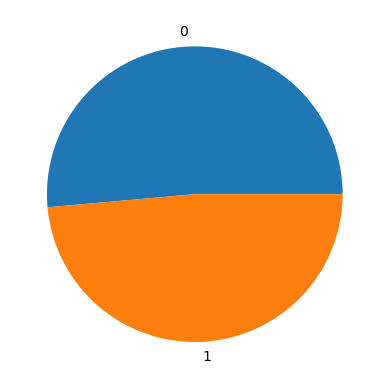

In [193]:
values=Oldrestaurent['target'].value_counts()
labels=Oldrestaurent['target'].value_counts().index
plt.pie(values,labels=labels);

**Features**

In [194]:
Oldrestaurent.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [195]:
Oldrestaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


In [196]:
#converting cuisines and rest types as number.......everyone given equal weightage
def count(x):
    test = len(x.split(","))
    return test

Oldrestaurent['total_Cuisines']=Oldrestaurent['cuisines'].astype(str).apply(count)
Oldrestaurent['Total_types']=Oldrestaurent['rest_type'].astype(str).apply(count)

In [197]:
Oldrestaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_Cuisines,Total_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1,3,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,2,1


In [198]:
imp_features=['online_order','book_table','location','rest_type','Total_types','total_Cuisines','listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [199]:
Final_data = Oldrestaurent[imp_features]

In [200]:
Final_data.head()
#Final_data.to_csv("Final_data1.csv")

,online_order,book_table,location,rest_type,Total_types,total_Cuisines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1


In [201]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 41665 non-null  object 
 1   book_table                   41665 non-null  object 
 2   location                     41665 non-null  object 
 3   rest_type                    41516 non-null  object 
 4   Total_types                  41665 non-null  int64  
 5   total_Cuisines               41665 non-null  int64  
 6   listed_in(type)              41665 non-null  object 
 7   listed_in(city)              41665 non-null  object 
 8   approx_cost(for two people)  41418 non-null  float64
 9   target                       41665 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 3.5+ MB


In [202]:
Final_data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
Total_types                      0
total_Cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [203]:
#drop not available rows
Final_data = Final_data.dropna()

In [204]:
Final_data.isnull().sum()

online_order                   0
book_table                     0
location                       0
rest_type                      0
Total_types                    0
total_Cuisines                 0
listed_in(type)                0
listed_in(city)                0
approx_cost(for two people)    0
target                         0
dtype: int64

In [205]:
#spliiting features by data types i.e is categorical features and numeical features
catfeat = []
numfeat = []

for test in Final_data.columns:
    if Final_data[test].dtype == "O":
        catfeat.append(test)
    else:
        numfeat.append(test)
        

In [206]:
catfeat

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [207]:
numfeat

['Total_types', 'total_Cuisines', 'approx_cost(for two people)', 'target']

In [208]:
#checking number of categories in categorical features
for test in catfeat:
    print("{} has {} number of features".format(test,len(Final_data[test].unique())))


online_order has 2 number of features
book_table has 2 number of features
location has 92 number of features
rest_type has 87 number of features
listed_in(type) has 7 number of features
listed_in(city) has 30 number of features


In [209]:
#we need to reduce categorical features in Location, rest_types as one hot encoding will create long list of clumns
#showing percentage of each category in their respective catergorical features
cols=['location','rest_type']
for col in cols:
    print('Total feature in {} are {}'.format(col,len(Final_data[col].unique())))
    print(Final_data[col].value_counts()/(len(Final_data))*100)
    print('\n')

Total feature in location are 92
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64


Total feature in rest_type are 87
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64




In [210]:
#Location Feature with 92 unique values

Lperlist = (Final_data["location"].value_counts() / len(Final_data))*100
#len(Lperlist[Lperlist>0.4]) = 46 decided by bar plot
#after trying multiple thresholds...0.4 looks suitable

IMPLperlist = Lperlist[Lperlist>0.4]
IMPLperlist

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [211]:
def IMP(test):
    if test in IMPLperlist.index:
        return test
    else:
        return "other"
    
    
    

In [212]:
#all location less than 0.4 percent presence is categorized as other
Final_data["location"]=Final_data["location"].apply(IMP)

In [213]:
#so unique feature is reduced to 47
Final_data["location"].nunique()

47

In [214]:
#same process for restype
Rperlist = (Final_data["rest_type"].value_counts() / len(Final_data))*100
Rperlist

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [215]:
#threshold = 1.5
IMPRperlist = Rperlist[Rperlist>1.5]
IMPRperlist

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [216]:
def IMP2(test):
    if test in IMPRperlist.index:
        return test
    else:
        return "other"

In [217]:
#all restaurent with type category lower than 1.5 percent is marked as other
Final_data["rest_type"]=Final_data["rest_type"].apply(IMP2)

In [218]:
#total category reduced to 11
Final_data["rest_type"].nunique()

11

In [219]:

for test in catfeat:
    print('{} has total {} unique features'.format(test, Final_data[test].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [220]:
Final_data

,online_order,book_table,location,rest_type,Total_types,total_Cuisines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,other,2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",2,2,Pubs and bars,Whitefield,800.0,0
51711,No,No,Whitefield,"Casual Dining, Bar",2,4,Pubs and bars,Whitefield,800.0,0
51712,No,No,Whitefield,Bar,1,1,Pubs and bars,Whitefield,1500.0,0
51715,No,Yes,other,Bar,1,1,Pubs and bars,Whitefield,2500.0,1


In [221]:
Finaledata=pd.get_dummies(Final_data,drop_first=True)

In [222]:
#Finaledata.to_csv("Final_data.csv")

**Train test split**

In [223]:
X = Finaledata.drop("target",axis=1)
y = Finaledata["target"]

In [224]:
y

0        1
1        1
2        1
3        0
4        1
        ..
51709    0
51711    0
51712    0
51715    1
51716    0
Name: target, Length: 41271, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [226]:
X_train.shape

(33016, 96)

In [227]:
#standard scaled data to be only used in Loggistic regression,KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [228]:
scaled_X_train.shape

(33016, 96)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [106]:
models = []
models.append(('LogisticRegression', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(("AdaBoostClassifier", AdaBoostClassifier()))
models.append(("XGBoostClassifier", XGBClassifier()))
            



models

[('LogisticRegression', LogisticRegression(max_iter=1000)),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('XGBoostClassifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [108]:
# Make predictions on validation dataset

for name, model in models:
    
    if model in (LogisticRegression(max_iter=1000),KNeighborsClassifier(n_neighbors = 5)):
        print(name)
        model.fit(scaled_X_train, y_train)
        predictions = model.predict(scaled_X_test)
        
    else:
        print(name)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)

    # Compute the error.
    print(confusion_matrix(predictions, y_test))

    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[3440 1450]
 [ 812 2553]]
0.7259842519685039


KNN
[[3609  997]
 [ 643 3006]]
0.8013325257419746


Decision Tree
[[3653  815]
 [ 599 3188]]
0.828709872804361


RandomForest
[[3511  926]
 [ 741 3077]]
0.7980617807389461


AdaBoostClassifier
[[3505 1512]
 [ 747 2491]]
0.7263476680799515


XGBoostClassifier
[[3716 1149]
 [ 536 2854]]
0.7958812840702605




In [109]:
# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10 , random_state=1,oob_score=True)

In [110]:
model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, oob_score=True, random_state=1)

In [111]:
# Make predictions.
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)

array([[3556, 1283],
       [ 696, 2720]], dtype=int64)

In [112]:
accuracy_score(predictions,y_test)


0.7602665051483949

In [113]:
model.oob_score_

0.7626908165737825

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
n_estimators=[64,100,128,200]
max_features= [2,3,4,8]
oob_score = [True]

In [116]:
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'oob_score':oob_score} 

In [119]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid,verbose=1)

In [120]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 8],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True]},
             verbose=1)

In [121]:
grid.best_params_

{'max_features': 8, 'n_estimators': 128, 'oob_score': True}

In [122]:
predictions = grid.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4252
           1       0.80      0.76      0.78      4003

    accuracy                           0.79      8255
   macro avg       0.79      0.79      0.79      8255
weighted avg       0.79      0.79      0.79      8255



In [127]:
grid.best_estimator_.oob_score_

0.792312818027623